In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [41]:
data = pd.read_csv("headbrain.csv")

In [42]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [43]:
x = data["Head Size(cm^3)"].values
y = data["Brain Weight(grams)"].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y)

In [44]:
x[:10],y[:10]

(array([[ 2.40886829],
        [ 0.28535333],
        [ 1.72023489],
        [ 0.39235214],
        [ 1.4897759 ],
        [-0.13441126],
        [ 0.41430062],
        [-0.2057438 ],
        [-0.05759159],
        [ 0.95478182]]),
 array([[ 2.0579083 ],
        [ 0.11763692],
        [ 0.43407603],
        [-0.00727325],
        [ 2.557549  ],
        [ 0.14261896],
        [ 0.97535345],
        [-0.23211156],
        [ 0.60062293],
        [ 0.76716983]]))

In [45]:
epochs = 100000
alpha = 0.003
n = len(x)
errors = []
def gradient(epochs,alpha,x,y):
    slope = 0
    intercept = 0
    for epoch in range(epochs):
        y_pred = x*slope + intercept
        error = y_pred - y
        errors.append(error)
        grad_intercept = (2/n) * np.sum(error)
        intercept = intercept - alpha*grad_intercept
        grad_slope = (2/n) * np.sum(error * x)
        slope = slope - alpha*grad_slope
    return slope,intercept

In [46]:
slope, intercept = gradient(epochs,alpha,x,y) 

In [47]:
slope, intercept

(0.7995697092542873, -3.328757803858336e-16)

In [48]:
y_predictions = x * slope + intercept

In [49]:
y_predictions[:]

array([[ 1.92605812],
       [ 0.22815988],
       [ 1.37544771],
       [ 0.31371289],
       [ 1.19117968],
       [-0.10747117],
       [ 0.33126223],
       [-0.16450651],
       [-0.04604849],
       [ 0.76341462],
       [-0.41897188],
       [ 0.78754496],
       [ 0.01318051],
       [ 1.25918336],
       [ 0.43436457],
       [ 0.53088592],
       [-0.30051386],
       [-0.36851754],
       [-1.18236799],
       [ 1.73301543],
       [ 0.53527326],
       [ 0.90380931],
       [ 0.3729419 ],
       [ 0.1667372 ],
       [ 2.44156986],
       [ 1.73082176],
       [ 0.88187264],
       [ 0.8511613 ],
       [-0.39484154],
       [ 1.18679235],
       [ 0.33564956],
       [ 0.35539256],
       [ 1.02884833],
       [ 1.15608101],
       [ 1.14950001],
       [ 0.39487857],
       [-0.23470386],
       [ 0.25009655],
       [-0.65808158],
       [-0.3114822 ],
       [ 0.71954128],
       [-0.28296453],
       [ 1.49390573],
       [ 0.3729419 ],
       [ 0.50236825],
       [ 0

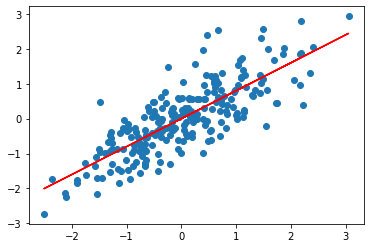

In [50]:
plt.scatter(x,y)
plt.plot(x,y_predictions,'red')
plt.show()